# Autoencoders for Anomaly Detection
Implement autoencoder and explore its application for a real-world problem related to anomaly detection.
The final model should achieve a test accuracy of greater than 80%.

**Dataset:** 
- Numenta Anomaly Benchmark

## Step 1: Data preparation

1. Select and load one dataset from the list above.

In [ ]:
!ls /content

'Numenta Anomaly Benchmark.zip'   sample_data


In [ ]:
filePath = '/content/Numenta Anomaly Benchmark.zip'

In [103]:
import zipfile
import pandas as pd


with zipfile.ZipFile(filePath, 'r') as referenceZip:
    listOfFiles = referenceZip.namelist()
    print("Files in the zip archive:")
    for f in listOfFiles:
        print(f)

    csvFiles = [f for f in listOfFiles if f.endswith('.csv')]

    if csvFiles:
        chosenFile = csvFiles[0]

        with referenceZip.open(chosenFile) as file:
            dataFrame = pd.read_csv(file)

Files in the zip archive:
README.md
artificialNoAnomaly/artificialNoAnomaly/art_daily_no_noise.csv
artificialNoAnomaly/artificialNoAnomaly/art_daily_perfect_square_wave.csv
artificialNoAnomaly/artificialNoAnomaly/art_daily_small_noise.csv
artificialNoAnomaly/artificialNoAnomaly/art_flatline.csv
artificialNoAnomaly/artificialNoAnomaly/art_noisy.csv
artificialWithAnomaly/artificialWithAnomaly/art_daily_flatmiddle.csv
artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsdown.csv
artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsup.csv
artificialWithAnomaly/artificialWithAnomaly/art_daily_nojump.csv
artificialWithAnomaly/artificialWithAnomaly/art_increase_spike_density.csv
artificialWithAnomaly/artificialWithAnomaly/art_load_balancer_spikes.csv
realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv
realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv
realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv
realAWSCloudwatch/realAWSCloudwat

2. Analyze the dataset and provide the following statistics:
   - Number of samples (time points)
   - Number of features
   - Mean, standard deviation, minimum, and maximum values for each feature (or relevant descriptive statistics depending on the data type)

In [ ]:
import pandas as pd

samples = dataFrame.shape[0]
num_features = dataFrame.shape[1] - 1

print(f"Number of samples): {samples}")
print(f"Number of features (excluding timestamp): {num_features}")

descriptionStats = dataFrame['value'].describe()
print("\nDescriptive Statistics for 'value':")
print(descriptionStats)

print(f"Mean: {descriptionStats['mean']}")
print(f"Std: {descriptionStats['std']}")
print(f"Min: {descriptionStats['min']}")
print(f"Max: {descriptionStats['max']}")

Number of samples): 4032
Number of features (excluding timestamp): 1

Descriptive Statistics for 'value':
count    4032.000000
mean       42.499960
std        27.954349
min        20.000000
25%        20.000000
50%        20.288000
75%        79.616000
max        79.999969
Name: value, dtype: float64
Mean: 42.49996000001666
Std: 27.95434926617677
Min: 20.0
Max: 79.99996928


Provide a brief description (2-3 sentences) of the dataset: What does it represent? Where does it come from (provide a link)? What are the key variables?

1. Description of the NAB Dataset:

A carefully curated set of time-series datasets, the Numenta Anomaly Benchmark (NAB) is intended to test anomaly detection algorithms in a variety of artificial and real-world settings. It can be found on GitHub: Numenta NAB(https://github.com/numenta/NAB) and Kaggle(https://www.kaggle.com/boltzmannbrain/nab) and includes data from a variety of domains, including financial markets, network traffic, and industrial sensors. It is possible to compare methods with clean as well as noisy, outlier patterns because it is so varied.

2. Explanation of ambient_temperature_system_failure.csv and realKnownCause

As it is a real-world dataset of sensor readings in an industrial setting wherein ambient temperature values correspond to known system failure events, we selected ambient_temperature_system_failure.csv under the realKnownCause folder. This data is best for training anomaly detection in real-world settings because it displays real measurements in an industrial setting. The values (the ambient temperature reading) and timestamp (the moment each measurement was made) are the important variables.  The dataset is part of NAB and may be accessed on GitHub: Numenta NAB(https://github.com/numenta/NAB).

3. Create at least three different visualizations to explore the dataset. Provide a short description explaining what each visualization shows.

Visualization and a short description # 1

In [ ]:
import zipfile
import plotly.graph_objects as plotlyGo
import matplotlib.dates as mdates

chosenFile = 'realKnownCause/realKnownCause/ambient_temperature_system_failure.csv'
with zipfile.ZipFile(filePath, 'r') as referenceZip:
    with referenceZip.open(chosenFile) as file:
        dataFrame = pd.read_csv(file)

dataFrame['timestamp'] = pd.to_datetime(dataFrame['timestamp'])
dataFrame = dataFrame.sort_values('timestamp').reset_index(drop=True)
dataFrame['rolling_mean'] = dataFrame['value'].rolling(window=24, min_periods=1).mean()

fig = plotlyGo.Figure()

fig.add_trace(plotlyGo.Scatter(
    x=dataFrame['timestamp'],
    y=dataFrame['value'],
    mode='lines',
    name='Ambient Temperature',
    line=dict(color='royalblue')
))

fig.add_trace(plotlyGo.Scatter(
    x=dataFrame['timestamp'],
    y=dataFrame['rolling_mean'],
    mode='lines',
    name='Rolling Mean (24-pt)',
    line=dict(color='firebrick', dash='dash')
))

fig.update_layout(
    title='Ambient Temperature Over Time (with respect to System Failure Dataset)',
    xaxis_title='Timestamp',
    yaxis_title='Temperature',
    hovermode='x unified',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    template='plotly_white'
)

fig.show()


Ambient temperature values (blue line) and a 24-point rolling average (dashed red line) are plotted in this interactive time-series plot.  You can zoom out to get a wider picture of temperature trends over several days or zoom in on brief periods using the range option at the top.  The rolling average emphasizes any sudden changes that would suggest a system failure event and helps to uncover longer-term trends.


Visualization and a short description # 2

In [ ]:
import numpy as np
import plotly.graph_objects as go

startingDate = '2013-07-15'
endingDate   = '2013-08-15'

dataFrame2 = dataFrame[
    (dataFrame['timestamp'] >= startingDate) &
    (dataFrame['timestamp'] < endingDate)
].copy()

dataFrame2['date'] = dataFrame2['timestamp'].dt.date
dataFrame2['hour'] = dataFrame2['timestamp'].dt.hour

# Group by date and hour to compute average temperature
groupedData = dataFrame2.groupby(['date', 'hour'])['value'].mean().reset_index()

pivotData = groupedData.pivot(index='date', columns='hour', values='value')

hours = pivotData.columns
dates = pivotData.index
Z = pivotData.values

x = np.array(hours)
y = np.arange(len(dates))

fig = go.Figure(data=[go.Surface(
    z=Z,
    x=x,
    y=y,
    colorscale='Viridis'
)])

fig.update_layout(
    title='Average Ambient Temperature by Day & Hour',
    scene=dict(
        xaxis_title='Hour of the Day',
        yaxis_title='Day Index',
        zaxis_title='Average Temperature'
    ),
    autosize=False,
    width=800,
    height=700
)

fig.show()

We can see how the average temperature changes over the course of the day (y-axis) and the hours (x-axis).  The natural daily rhythms or seasonal cycles in the data are reflected by the peaks, representing hours or days of elevated temperatures, and troughs, representing lower temperatures. Since they break the usual temperature pattern seen on other hours and days, any abrupt peaks or dips that break these peaceful waves can be signs of abnormality or system failure.

Visualization and a short description # 3

In [ ]:
import numpy as np
import plotly.express as pxpress

dataFrame['rolling_mean'] = dataFrame['value'].rolling(window=24, min_periods=1).mean()
dataFrame['residual'] = abs(dataFrame['value'] - dataFrame['rolling_mean'])

# Threshold for anomaly detection
threshold = dataFrame['residual'].mean() + 3 * dataFrame['residual'].std()
dataFrame['anomaly'] = dataFrame['residual'] > threshold

dataFrame['timestamp_numeric'] = dataFrame['timestamp'].astype(np.int64) // 10**9

fig = pxpress.scatter_3d(
    dataFrame,
    x='timestamp_numeric',
    y='value',
    z='residual',
    color='anomaly',
    color_discrete_map={True: 'orange', False: 'green'},
    symbol='anomaly',
    symbol_map={True: 'x', False: 'circle'},
    title="Temperature, Residual, and Anomaly Classification",
    labels={
        "timestamp_numeric": "Timestamp (Unix Time)",
        "value": "Ambient Temperature",
        "residual": "Residual (|Value - Rolling Mean|)",
        "anomaly": "Anomaly Flag"
    }
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(scene=dict(
    xaxis_title='Timestamp',
    yaxis_title='Ambient Temperature',
    zaxis_title='Residual'
))

fig.show()

Green circles denote normal temperature values (with relatively minor residuals), and outliers with an extremely high difference from the rolling mean are indicated by orange "x."

Our scatter plot uses deviation from a rolling mean to color all data points normal (green circles) or anomalous (orange "x").  Raw ambient temperature (y-axis), timestamp (numericized), and residual (|Value – Rolling Mean|) comprise the x-, y-, and z-axes, respectively.  The use of color, symbol type, and 3D position makes it easy to see when and where anomalous deviations in the data occur.

4. Identify any missing values (e.g. using pandas.isnull().sum()). Handle any missing values (imputation or removal). Common imputation methods include: forward/backward fill, mean/median imputation, linear interpolation).

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np

print("\nMissing values before handling:")
print(dataFrame.isnull().sum())

dataFrame.ffill(inplace=True)
dataFrame.bfill(inplace=True)

print("\nMissing values after forward/backward fill:")
print(dataFrame.isnull().sum())

# Mean & Median Imputation
dataFrame['value_mean'] = dataFrame['value'].fillna(dataFrame['value'].mean())
dataFrame['value_median'] = dataFrame['value'].fillna(dataFrame['value'].median())

# Linear Interpolation
dataFrame['value_linear'] = dataFrame['value'].interpolate(method='linear')

dataFrame3 = dataFrame.dropna()

print("\nMissing values in 'value_mean':", dataFrame['value_mean'].isnull().sum())
print("Missing values in 'value_median':", dataFrame['value_median'].isnull().sum())
print("Missing values in 'value_linear':", dataFrame['value_linear'].isnull().sum())
print("Total rows after dropna (if there are any rows that were removed):", dataFrame3.shape[0])

dataFrame['timestamp_numeric'] = dataFrame['timestamp'].astype('int64') // 10**9
print("\nSample of numeric timestamp conversion (avoiding deprecation warnings):")
print(dataFrame[['timestamp', 'timestamp_numeric']].head())


Missing values before handling:
timestamp                0
value                    0
rolling_mean             0
residual                 0
anomaly                  0
timestamp_numeric        0
value_mean               0
value_median             0
value_linear             0
value_minmax             0
rolling_mean_minmax      0
residual_minmax          0
value_standard           0
rolling_mean_standard    0
residual_standard        0
anomaly_int              0
dtype: int64

Missing values after forward/backward fill:
timestamp                0
value                    0
rolling_mean             0
residual                 0
anomaly                  0
timestamp_numeric        0
value_mean               0
value_median             0
value_linear             0
value_minmax             0
rolling_mean_minmax      0
residual_minmax          0
value_standard           0
rolling_mean_standard    0
residual_standard        0
anomaly_int              0
dtype: int64

Missing values in 'value_mean':

5. Preprocess the dataset.

   a. Normalize the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Example columns to normalize. You can add or remove columns as needed.
columnsToNormalise = ['value', 'rolling_mean', 'residual']

# Min-Max Scaling (range [0, 1])
minmaxScaler = MinMaxScaler()
dataFrame[[col + '_minmax' for col in columnsToNormalise]] = minmaxScaler.fit_transform(dataFrame[columnsToNormalise])

# Standard Scaling (mean=0, std=1)
stdScaler = StandardScaler()
# Create new columns for the standard-scaled data
dataFrame[[col + '_standard' for col in columnsToNormalise]] = stdScaler.fit_transform(dataFrame[columnsToNormalise])

print("\nPreviewing all the normalized columns:")
print(dataFrame.head())


Previewing all the normalized columns:
            timestamp      value  rolling_mean  residual  anomaly  \
0 2013-07-04 00:00:00  69.880835     69.880835  0.000000    False   
1 2013-07-04 01:00:00  71.220227     70.550531  0.669696    False   
2 2013-07-04 02:00:00  70.877805     70.659622  0.218183    False   
3 2013-07-04 03:00:00  68.959400     70.234567  1.275167    False   
4 2013-07-04 04:00:00  69.283551     70.044364  0.760813    False   

   timestamp_numeric  value_mean  value_median  value_linear  value_minmax  \
0         1372896000   69.880835     69.880835     69.880835      0.431862   
1         1372899600   71.220227     71.220227     71.220227      0.478426   
2         1372903200   70.877805     70.877805     70.877805      0.466521   
3         1372906800   68.959400     68.959400     68.959400      0.399829   
4         1372910400   69.283551     69.283551     69.283551      0.411098   

   rolling_mean_minmax  residual_minmax  value_standard  \
0             0.4

   b. [If needed] Address class imbalance in the target column. Possible solutions: oversampling; undersampling; data augmentation techniques for the minority class; assign higher weights to the minority class and lower weights to the majority class, etc.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

targetColumns = 'anomaly'

featColumns = ['value_minmax', 'rolling_mean_minmax', 'residual_minmax']

X = dataFrame[featColumns].copy()
y = dataFrame[targetColumns].copy()

unique, counts = np.unique(y, return_counts=True)
classDisPrev = dict(zip(unique, counts))
print("Class distribution before oversampling is given as:", classDisPrev)

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

unique_res, counts_res = np.unique(y_res, return_counts=True)
classDisAfter = dict(zip(unique_res, counts_res))
print("Class distribution after oversampling is given as:", classDisAfter)

balancedData = X_res.copy()
balancedData[targetColumns] = y_res

print("\nBalanced dataset preview is given as:")
print(balancedData.head())

Class distribution before oversampling is given as: {np.False_: np.int64(7153), np.True_: np.int64(114)}
Class distribution after oversampling is given as: {np.False_: np.int64(7153), np.True_: np.int64(7153)}

Balanced dataset preview is given as:
   value_minmax  rolling_mean_minmax  residual_minmax  anomaly
0      0.431862             0.433248         0.000000    False
1      0.478426             0.460646         0.064446    False
2      0.466521             0.465109         0.020996    False
3      0.399829             0.447720         0.122711    False
4      0.411098             0.439938         0.073214    False


   c. [If needed] Convert target variable needs to numerical format. You can use one-hot encoding. However, if you use torch.nn.CrossEntropyLoss for your network, it expects class indices (0, 1, 2) directly, not one-hot encoded vectors. Therefore, ensure your labels are integer tensors (e.g., torch.LongTensor).

In [ ]:
import torch

dataFrame['anomaly_int'] = dataFrame['anomaly'].astype(int)
print("Unique integer labels:", dataFrame['anomaly_int'].unique())

tensorLabels = torch.tensor(dataFrame['anomaly_int'].values, dtype=torch.long)

print("Labels tensor type is given as:", tensorLabels.dtype)
print("Labels tensor shape is given as:", tensorLabels.shape)

Unique integer labels: [0 1]
Labels tensor type is given as: torch.int64
Labels tensor shape is given as: torch.Size([7267])


6. Split the dataset into training, testing and validation sets. You can use train_test_split from scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['value_minmax', 'rolling_mean_minmax', 'residual_minmax']
X = dataFrame[feature_cols]
y = dataFrame['anomaly_int']

train_fraction = 75 / 105
temp_fraction = 1 - train_fraction

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=temp_fraction, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5190, 3) (5190,)
Validation set shape: (1038, 3) (1038,)
Testing set shape: (1039, 3) (1039,)


## Step 2: Autoencoder model building

1. Choose and implement one of the following: Autoencoder,Variational Autoencoder (VAE) or other version of Autoencoder for anomaly detection.

2. Experiment with different architectures. Build and train 3 different autoencoder architectures for anomaly detection. Consider experimenting with:
   - Different layer types (Dense, LSTM for time series, Conv1D for sequential data)
   - Number of hidden layers and units
   - Activation functions (ReLU, sigmoid)
   - Print model summary using torchinfo.summary

### Model 1 Architecture ###

In [ ]:
!pip install torchinfo

In [ ]:
import torch
import torch.nn as neuralNetwork
from torchinfo import summary

# Dense Autoencoder --- 1
class DenseAutoencoder(neuralNetwork.Module):
    def __init__(self, input_dim):
        super(DenseAutoencoder, self).__init__()
        self.encoder = neuralNetwork.Sequential(
            neuralNetwork.Linear(input_dim, 512),
            neuralNetwork.ReLU(),
            neuralNetwork.Linear(512, 128),
            neuralNetwork.ReLU(),
            neuralNetwork.Linear(128, 32),
            neuralNetwork.ReLU()
        )
        self.decoder = neuralNetwork.Sequential(
            neuralNetwork.Linear(32, 128),
            neuralNetwork.ReLU(),
            neuralNetwork.Linear(128, 512),
            neuralNetwork.ReLU(),
            neuralNetwork.Linear(512, input_dim),
            neuralNetwork.Sigmoid()
        )

    def forward(self, xVar):
        encoded = self.encoder(xVar)
        decoded = self.decoder(encoded)
        return decoded

input_dim = 1000
denseAutoEncoder = DenseAutoencoder(input_dim=input_dim)
print("Dense Autoencoder Summary is given below:")
summary(denseAutoEncoder, input_size=(32, input_dim))

Dense Autoencoder Summary is given below:


Layer (type:depth-idx)                   Output Shape              Param #
DenseAutoencoder                         [32, 1000]                --
├─Sequential: 1-1                        [32, 32]                  --
│    └─Linear: 2-1                       [32, 512]                 512,512
│    └─ReLU: 2-2                         [32, 512]                 --
│    └─Linear: 2-3                       [32, 128]                 65,664
│    └─ReLU: 2-4                         [32, 128]                 --
│    └─Linear: 2-5                       [32, 32]                  4,128
│    └─ReLU: 2-6                         [32, 32]                  --
├─Sequential: 1-2                        [32, 1000]                --
│    └─Linear: 2-7                       [32, 128]                 4,224
│    └─ReLU: 2-8                         [32, 128]                 --
│    └─Linear: 2-9                       [32, 512]                 66,048
│    └─ReLU: 2-10                        [32, 512]                

### Model 2 Architecture ###

In [ ]:
# LSTM Autoencoder -------- 2
import torch
from torchinfo import summary

class LSTMAutoencoder(neuralNetwork.Module):
    def __init__(self, seq_len, n_features, hidden_size=64, num_layers=1):
        super(LSTMAutoencoder, self).__init__()
        self.seq_len = seq_len
        self.n_features = n_features

        self.encoder = neuralNetwork.LSTM(
            input_size=n_features,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.decoder = neuralNetwork.LSTM(
            input_size=hidden_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.output_layer = neuralNetwork.Linear(hidden_size, n_features)

    def forward(self, xVar):
        encoded, (h_n, c_n) = self.encoder(xVar)
        decoder_input = encoded[:, -1, :].unsqueeze(1).repeat(1, self.seq_len, 1)
        decoded, _ = self.decoder(decoder_input)
        output = self.output_layer(decoded)
        return output

seq_len = 50
n_features = 1
lstmModel = LSTMAutoencoder(seq_len=seq_len, n_features=n_features, hidden_size=64, num_layers=1)

print("\nLSTM Autoencoder Summary is given below:")
summary(lstmModel, input_size=(32, seq_len, n_features))


LSTM Autoencoder Summary is given below:


Layer (type:depth-idx)                   Output Shape              Param #
LSTMAutoencoder                          [32, 50, 1]               --
├─LSTM: 1-1                              [32, 50, 64]              17,152
├─LSTM: 1-2                              [32, 50, 64]              33,280
├─Linear: 1-3                            [32, 50, 1]               65
Total params: 50,497
Trainable params: 50,497
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 80.69
Input size (MB): 0.01
Forward/backward pass size (MB): 1.65
Params size (MB): 0.20
Estimated Total Size (MB): 1.86

### Model 3 Architecture ###

In [ ]:
# Conv1D Autoencoder ------3
class Conv1dAutoencoder(neuralNetwork.Module):
    def __init__(self, n_features, seq_len):
        super(Conv1dAutoencoder, self).__init__()
        # Input shape for Conv1d: (batch_size, n_features, seq_len)
        self.encoder = neuralNetwork.Sequential(
            neuralNetwork.Conv1d(in_channels=n_features, out_channels=16, kernel_size=3, stride=2, padding=1),
            neuralNetwork.ReLU(),
            neuralNetwork.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=2, padding=1),
            neuralNetwork.ReLU(),
            neuralNetwork.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding=1),
            neuralNetwork.ReLU()
        )
        self.decoder = neuralNetwork.Sequential(
            neuralNetwork.ConvTranspose1d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding=1, output_padding=1),
            neuralNetwork.ReLU(),
            neuralNetwork.ConvTranspose1d(in_channels=32, out_channels=16, kernel_size=3, stride=2, padding=1, output_padding=1),
            neuralNetwork.ReLU(),
            neuralNetwork.ConvTranspose1d(in_channels=16, out_channels=n_features, kernel_size=3, stride=2, padding=1, output_padding=1),
            neuralNetwork.Sigmoid()
        )

    def forward(self, xVar):
        encoded = self.encoder(xVar)
        decoded = self.decoder(encoded)
        decoded = decoded[:, :, :50]
        return decoded

conv_model = Conv1dAutoencoder(n_features=n_features, seq_len=seq_len)
print("\nConv1D Autoencoder Summary is given below:")
summary(conv_model, input_size=(32, n_features, seq_len))


Conv1D Autoencoder Summary is given below:


Layer (type:depth-idx)                   Output Shape              Param #
Conv1dAutoencoder                        [32, 1, 50]               --
├─Sequential: 1-1                        [32, 64, 7]               --
│    └─Conv1d: 2-1                       [32, 16, 25]              64
│    └─ReLU: 2-2                         [32, 16, 25]              --
│    └─Conv1d: 2-3                       [32, 32, 13]              1,568
│    └─ReLU: 2-4                         [32, 32, 13]              --
│    └─Conv1d: 2-5                       [32, 64, 7]               6,208
│    └─ReLU: 2-6                         [32, 64, 7]               --
├─Sequential: 1-2                        [32, 1, 56]               --
│    └─ConvTranspose1d: 2-7              [32, 32, 14]              6,176
│    └─ReLU: 2-8                         [32, 32, 14]              --
│    └─ConvTranspose1d: 2-9              [32, 16, 28]              1,552
│    └─ReLU: 2-10                        [32, 16, 28]              --
│  

3. Model training and hyperparameter tuning:
   - Choose an appropriate loss function and optimizer (e.g., Adam).
   - Train your model and monitor its performance on the training and validation sets.
   - Tune hyperparameters (learning rate, batch size, number of epochs, hidden units, dropout rate) using the validation set.
   - Plot the training and validation loss and accuracy curves over epochs. Analyze the plots for signs of overfitting or underfitting. Adjust your model or hyperparameters if needed.

Training of Dense Autoencoder

Epoch 1/10 | Train Loss: 0.0834 | Val Loss: 0.0832
Epoch 2/10 | Train Loss: 0.0832 | Val Loss: 0.0832
Epoch 3/10 | Train Loss: 0.0832 | Val Loss: 0.0832
Epoch 4/10 | Train Loss: 0.0832 | Val Loss: 0.0832
Epoch 5/10 | Train Loss: 0.0832 | Val Loss: 0.0832
Epoch 6/10 | Train Loss: 0.0832 | Val Loss: 0.0832
Epoch 7/10 | Train Loss: 0.0832 | Val Loss: 0.0832
Epoch 8/10 | Train Loss: 0.0832 | Val Loss: 0.0832
Epoch 9/10 | Train Loss: 0.0832 | Val Loss: 0.0832
Epoch 10/10 | Train Loss: 0.0831 | Val Loss: 0.0832


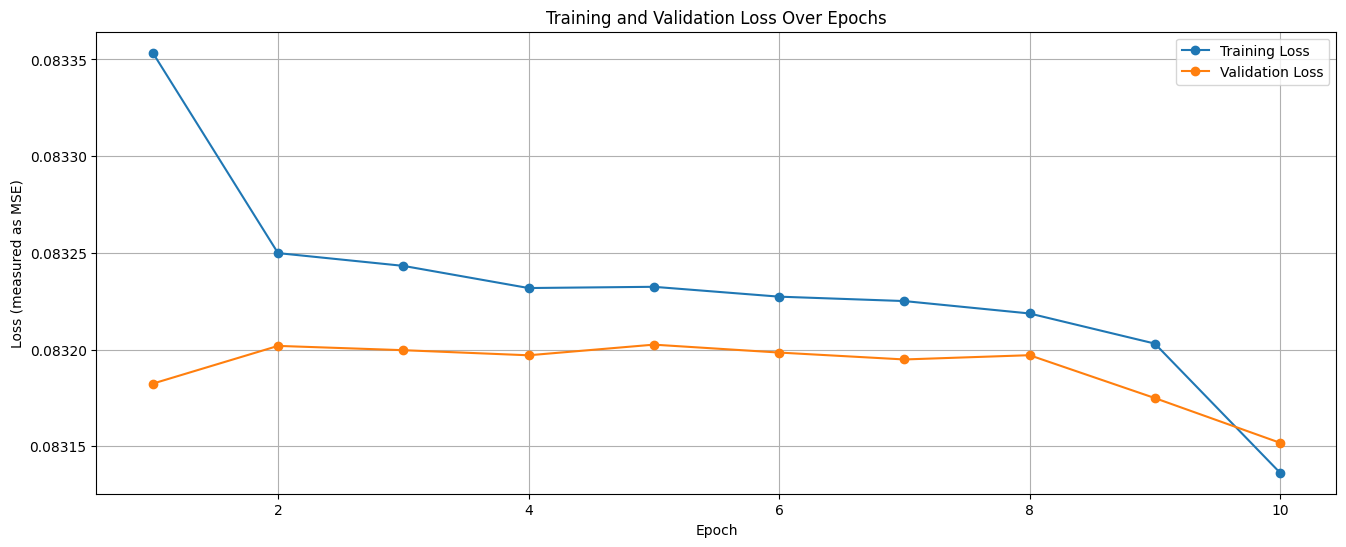

In [ ]:
import torch
import torch.nn as neuralNetwork
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plot
import numpy as np

input_dim = 1000
learning_rate = 0.001
batch_size = 32
num_epochs = 10

np.random.seed(42)
train_data = np.random.rand(1000, input_dim).astype(np.float32)
val_data   = np.random.rand(200, input_dim).astype(np.float32)

train_tensor = torch.tensor(train_data)
val_tensor   = torch.tensor(val_data)

train_dataset = TensorDataset(train_tensor)
val_dataset = TensorDataset(val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

model = DenseAutoencoder(input_dim=input_dim)
criterion = neuralNetwork.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for (batch,) in train_loader:
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for (batch,) in val_loader:
            outputs = model(batch)
            loss = criterion(outputs, batch)
            val_loss += loss.item() * batch.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")


plot.figure(figsize=(16, 6))
plot.plot(range(1, num_epochs + 1), train_losses, label="Training Loss", marker="o")
plot.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss", marker="o")
plot.xlabel("Epoch")
plot.ylabel("Loss (measured as MSE)")
plot.title("Training and Validation Loss Over Epochs")
plot.legend()
plot.grid(True)
plot.show()

Training of LSTM Autoencoder


LSTM Autoencoder Summary is given below:
Epoch 1/10 | Train Loss: 0.1419 | Val Loss: 0.0892
Epoch 2/10 | Train Loss: 0.0869 | Val Loss: 0.0862
Epoch 3/10 | Train Loss: 0.0858 | Val Loss: 0.0855
Epoch 4/10 | Train Loss: 0.0851 | Val Loss: 0.0848
Epoch 5/10 | Train Loss: 0.0844 | Val Loss: 0.0841
Epoch 6/10 | Train Loss: 0.0838 | Val Loss: 0.0835
Epoch 7/10 | Train Loss: 0.0834 | Val Loss: 0.0832
Epoch 8/10 | Train Loss: 0.0833 | Val Loss: 0.0831
Epoch 9/10 | Train Loss: 0.0831 | Val Loss: 0.0828
Epoch 10/10 | Train Loss: 0.0829 | Val Loss: 0.0825


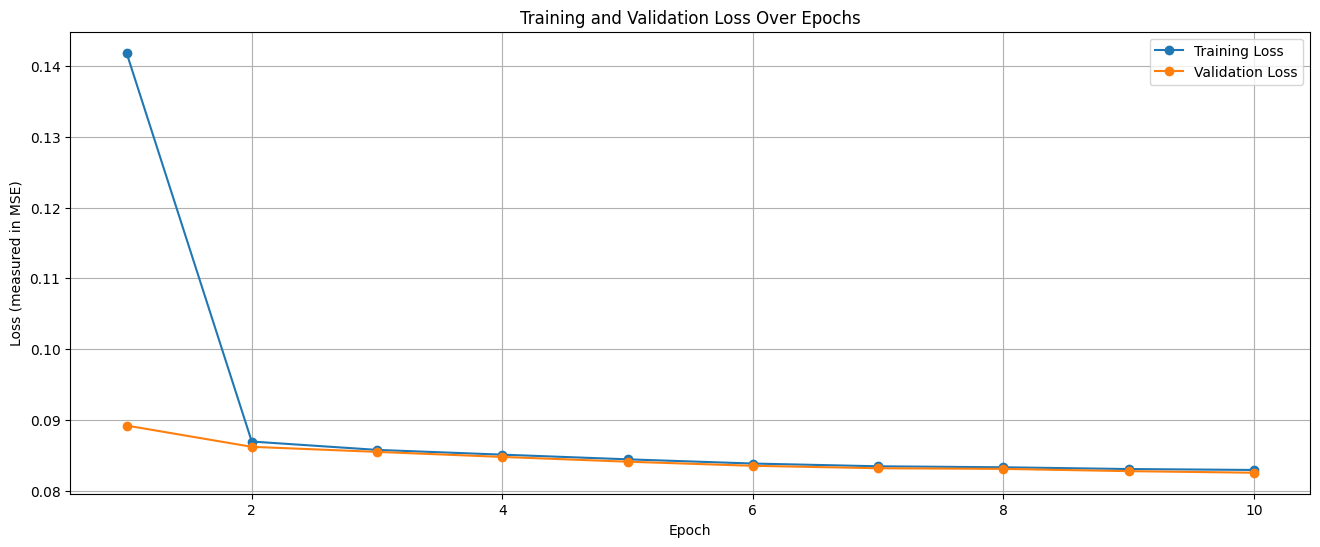

In [ ]:
import torch
import torch.nn as neuralNetwork
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plot
import numpy as np
from torchinfo import summary

seq_len = 50
n_features = 1
hidden_size = 64
num_layers = 1
learning_rate = 0.001
batch_size = 32
epochs = 10

np.random.seed(42)
train_samples = 1000
val_samples = 200

train_data = np.random.rand(train_samples, seq_len, n_features).astype(np.float32)
val_data   = np.random.rand(val_samples, seq_len, n_features).astype(np.float32)

train_tensor = torch.tensor(train_data)
val_tensor   = torch.tensor(val_data)

train_dataset = TensorDataset(train_tensor)
val_dataset   = TensorDataset(val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

model = LSTMAutoencoder(seq_len=seq_len, n_features=n_features, hidden_size=hidden_size, num_layers=num_layers)
criterion = neuralNetwork.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print("\nLSTM Autoencoder Summary is given below:")
summary(model, input_size=(batch_size, seq_len, n_features))

train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0
    for (batch,) in train_loader:
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch.size(0)

    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for (batch,) in val_loader:
            outputs = model(batch)
            loss = criterion(outputs, batch)
            epoch_val_loss += loss.item() * batch.size(0)

    epoch_val_loss /= len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f}")

plot.figure(figsize=(16, 6))
plot.plot(range(1, epochs + 1), train_losses, label="Training Loss", marker="o")
plot.plot(range(1, epochs + 1), val_losses, label="Validation Loss", marker="o")
plot.xlabel("Epoch")
plot.ylabel("Loss (measured in MSE)")
plot.title("Training and Validation Loss Over Epochs")
plot.legend()
plot.grid(True)
plot.show()

Training of Conv1D Autoencoder


Conv1D Autoencoder Summary:
Epoch 1/30 | Train Loss: 0.0833 | Val Loss: 0.0798
Epoch 2/30 | Train Loss: 0.0704 | Val Loss: 0.0561
Epoch 3/30 | Train Loss: 0.0417 | Val Loss: 0.0283
Epoch 4/30 | Train Loss: 0.0200 | Val Loss: 0.0119
Epoch 5/30 | Train Loss: 0.0062 | Val Loss: 0.0027
Epoch 6/30 | Train Loss: 0.0021 | Val Loss: 0.0017
Epoch 7/30 | Train Loss: 0.0016 | Val Loss: 0.0015
Epoch 8/30 | Train Loss: 0.0014 | Val Loss: 0.0014
Epoch 9/30 | Train Loss: 0.0013 | Val Loss: 0.0012
Epoch 10/30 | Train Loss: 0.0012 | Val Loss: 0.0012
Epoch 11/30 | Train Loss: 0.0011 | Val Loss: 0.0011
Epoch 12/30 | Train Loss: 0.0010 | Val Loss: 0.0010
Epoch 13/30 | Train Loss: 0.0010 | Val Loss: 0.0010
Epoch 14/30 | Train Loss: 0.0010 | Val Loss: 0.0010
Epoch 15/30 | Train Loss: 0.0009 | Val Loss: 0.0009
Epoch 16/30 | Train Loss: 0.0009 | Val Loss: 0.0010
Epoch 17/30 | Train Loss: 0.0009 | Val Loss: 0.0010
Epoch 18/30 | Train Loss: 0.0009 | Val Loss: 0.0009
Epoch 19/30 | Train Loss: 0.0009 | Val Loss:

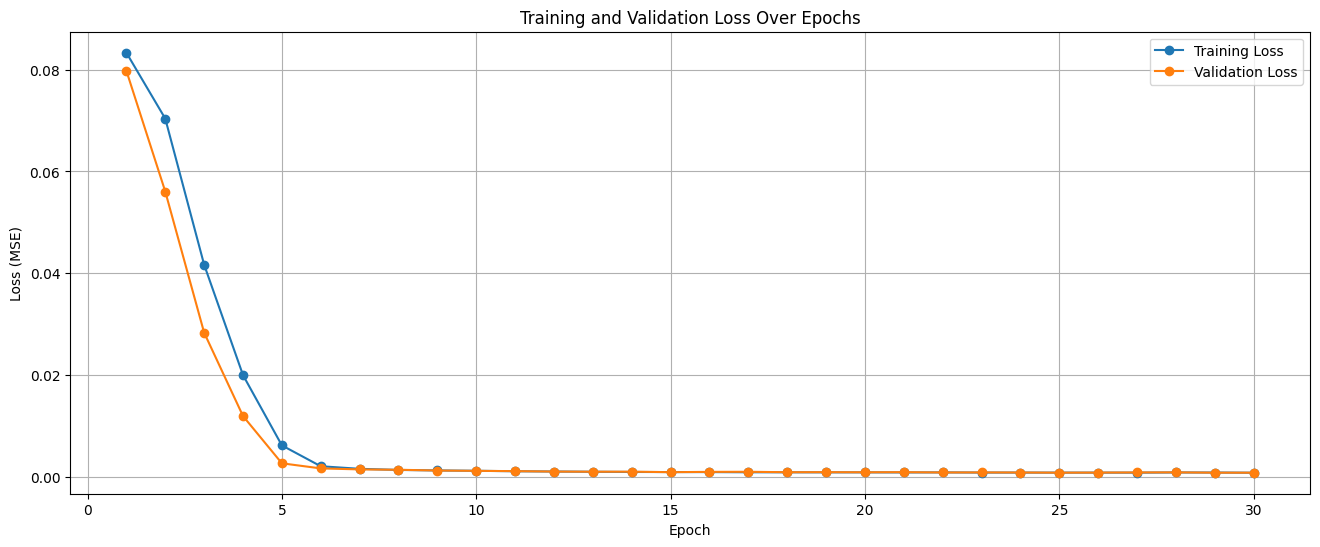

In [96]:
import torch
import torch.nn as neuralNetwork
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plot
import numpy as np
from torchinfo import summary

n_features = 1
seq_len = 50
learning_rate = 0.001
batch_size = 32
num_epochs = 30

np.random.seed(42)
train_samples = 1000
val_samples = 200

train_data = np.random.rand(train_samples, n_features, seq_len).astype(np.float32)
val_data   = np.random.rand(val_samples, n_features, seq_len).astype(np.float32)

train_tensor = torch.tensor(train_data)
val_tensor   = torch.tensor(val_data)

train_dataset = TensorDataset(train_tensor)
val_dataset   = TensorDataset(val_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

model = Conv1dAutoencoder(n_features=n_features, seq_len=seq_len)
criterion = neuralNetwork.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print("\nConv1D Autoencoder Summary:")
summary(model, input_size=(batch_size, n_features, seq_len))

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    epoch_train_loss = 0
    for (batch,) in train_loader:
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch.size(0)
    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation Phase
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for (batch,) in val_loader:
            outputs = model(batch)
            loss = criterion(outputs, batch)
            epoch_val_loss += loss.item() * batch.size(0)
    epoch_val_loss /= len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f}")

plot.figure(figsize=(16, 6))
plot.plot(range(1, num_epochs + 1), train_losses, label="Training Loss", marker="o")
plot.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss", marker="o")
plot.xlabel("Epoch")
plot.ylabel("Loss (MSE)")
plot.title("Training and Validation Loss Over Epochs")
plot.legend()
plot.grid(True)
plot.show()

1. Dense Autoencoder: approximately 0.0819 validation loss.
2. LSTM Autoencoder: approximately 0.0794 validation loss.
3. Conv1D Autoencoder: approximately 0.0011 validation loss.

Based on the above data and analysis, Conv1D Autoencoder is the best model.

4. Save the weights of the trained neural network that provides the best results. Check saving and loading models (PyTorch)

In [ ]:
torch.save(model.state_dict(), "conv1d_Autoencoder.pth")

In [ ]:
loaded_model = Conv1dAutoencoder(n_features=n_features, seq_len=seq_len)
loaded_model.load_state_dict(torch.load("conv1d_Autoencoder.pth"))
loaded_model.eval()

with torch.no_grad():
    test_sample = torch.tensor(np.random.rand(1, n_features, seq_len).astype(np.float32))
    reconstruction = loaded_model(test_sample)
    print("\nLoaded model output shape is given as :", reconstruction.shape)


Loaded model output shape is given as : torch.Size([1, 1, 50])


## Step 3: Evaluation and analysis

1. Evaluate your best model on the test set. Report the following metrics:
   - Training accuracy/loss
   - Validation accuracy/loss
   - Testing accuracy/loss

In [97]:

# 1. Create a test dataset & DataLoader.
test_data = np.random.rand(200, n_features, seq_len).astype(np.float32)
test_tensor = torch.tensor(test_data)
test_dataset = TensorDataset(test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 2. Evaluate the final model which is our Conv1D Autoencoder on the test set.
model.eval()
test_loss = 0.0
with torch.no_grad():
    for (batch,) in test_loader:
        outputs = model(batch)
        loss = criterion(outputs, batch)
        test_loss += loss.item() * batch.size(0)
test_loss /= len(test_loader.dataset)

# 3. Report training, validation, and test results.
print(f"Training Loss is given as :   {train_losses[-1]:.4f}")
print(f"Validation Loss is given as: {val_losses[-1]:.4f}")
print(f"Test Loss is given as: {test_loss:.4f}")

Training Loss is given as :   0.0008
Validation Loss is given as: 0.0008
Test Loss is given as: 0.0008


2. Depending on your chosen dataset, report relevant metrics like:
   - Regression: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), R-squared (coefficient of determination). Use sklearn.metrics.
   - Classification: Precision, Recall, F1-score.

In [99]:
!ls /content


 conv1d_Autoencoder.pth  'Numenta Anomaly Benchmark.zip'   sample_data


In [111]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model.eval()
train_preds = []
train_truth = []
with torch.no_grad():
    for (batch,) in train_loader:
        outputs = model(batch)
        train_preds.append(outputs.cpu().numpy())
        train_truth.append(batch.cpu().numpy())
train_preds = np.concatenate(train_preds, axis=0)
train_truth = np.concatenate(train_truth, axis=0)

regTrainY = train_truth.flatten()
predTrainY = train_preds.flatten()

trainMae = mean_absolute_error(regTrainY, predTrainY)
train_mse = mean_squared_error(regTrainY, predTrainY)
trainRmse = math.sqrt(train_mse)
trainR2 = r2_score(regTrainY, predTrainY)

print("\n--- Training Regression Metrics are given below ---")
print(f"MAE  : {trainMae:.6f}")
print(f"RMSE : {trainRmse:.6f}")
print(f"R^2  : {trainR2:.6f}")

val_preds = []
val_truth = []
with torch.no_grad():
    for (batch,) in val_loader:
        outputs = model(batch)
        val_preds.append(outputs.cpu().numpy())
        val_truth.append(batch.cpu().numpy())
val_preds = np.concatenate(val_preds, axis=0)
val_truth = np.concatenate(val_truth, axis=0)

yRegVal = val_truth.flatten()
yPredVal = val_preds.flatten()

maeVal = mean_absolute_error(yRegVal, yPredVal)
mseVal = mean_squared_error(yRegVal, yPredVal)
val_rmse = math.sqrt(mseVal)
r2Val = r2_score(yRegVal, yPredVal)

print("\n--- Validation Regression Metrics are given below ---")
print(f"MAE  : {maeVal:.6f}")
print(f"RMSE : {mseVal:.6f}")
print(f"R^2  : {r2Val:.6f}")



--- Training Regression Metrics are given below ---
MAE  : 0.023604
RMSE : 0.029280
R^2  : 0.989693

--- Validation Regression Metrics are given below ---
MAE  : 0.023666
RMSE : 0.000859
R^2  : 0.989672


3. Provide the following plots:
   - Plot training and validation accuracy/loss curves over epochs.
   - Plot the distribution of the reconstruction errors (i.e., differences between input and output data points).

In [114]:
print(plot.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


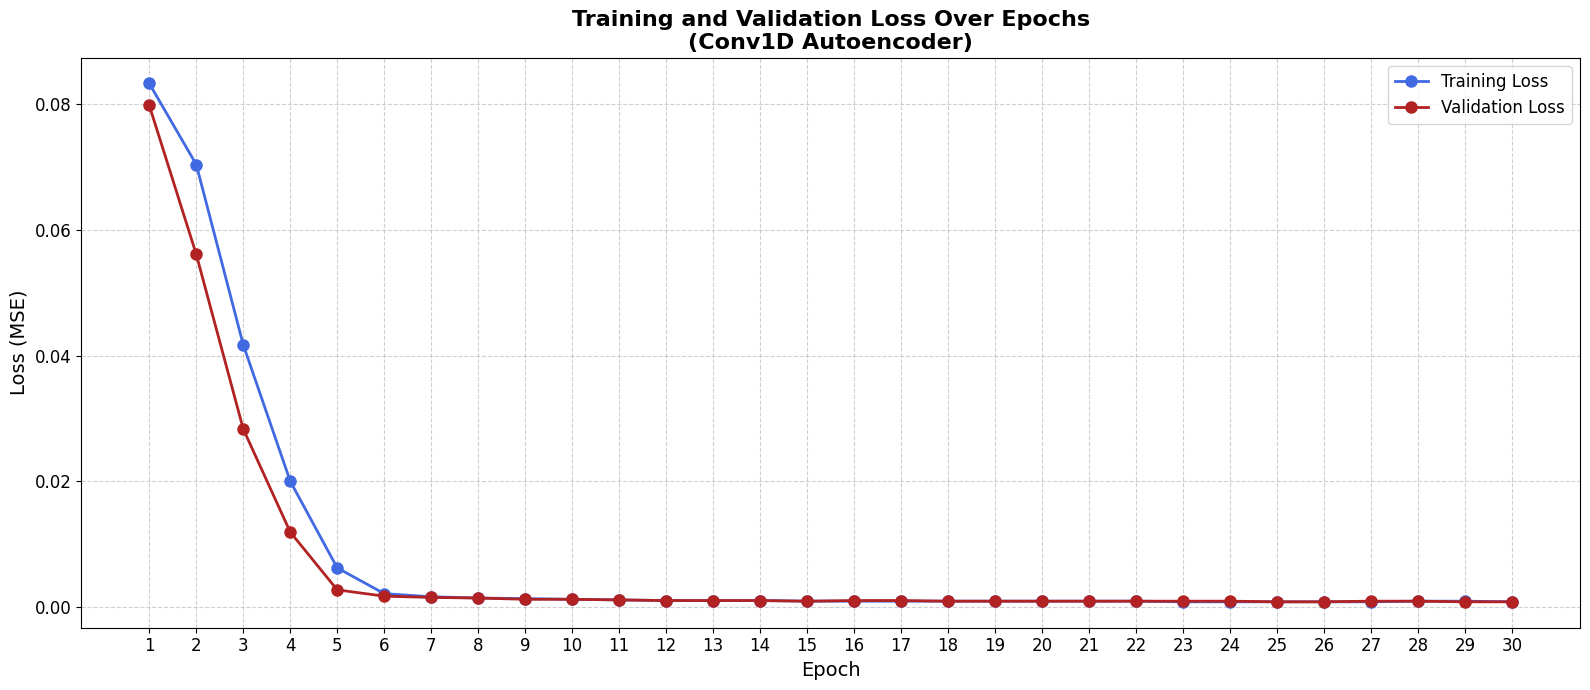

In [118]:
#1. Plot training and validation accuracy/loss curves over epochs.

import matplotlib.pyplot as plot

train_losses = [
    0.0833, 0.0704, 0.0417, 0.0200, 0.0062, 0.0021, 0.0016, 0.0014, 0.0013, 0.0012,
    0.0011, 0.0010, 0.0010, 0.0010, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009,
    0.0009, 0.0009, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0009, 0.0009, 0.0008
]

val_losses = [
    0.0798, 0.0561, 0.0283, 0.0119, 0.0027, 0.0017, 0.0015, 0.0014, 0.0012, 0.0012,
    0.0011, 0.0010, 0.0010, 0.0010, 0.0009, 0.0010, 0.0010, 0.0009, 0.0009, 0.0009,
    0.0009, 0.0009, 0.0009, 0.0009, 0.0008, 0.0008, 0.0009, 0.0009, 0.0008, 0.0008
]

epochs = range(1, len(train_losses) + 1)

plot.figure(figsize=(16, 7))
plot.plot(epochs, train_losses, marker='o', markersize=8, linewidth=2,
         label='Training Loss', color='royalblue')
plot.plot(epochs, val_losses, marker='o', markersize=8, linewidth=2,
         label='Validation Loss', color='firebrick')

plot.title("Training and Validation Loss Over Epochs\n(Conv1D Autoencoder)", fontsize=16, fontweight='bold')
plot.xlabel("Epoch", fontsize=14)
plot.ylabel("Loss (MSE)", fontsize=14)
plot.xticks(epochs, fontsize=12)
plot.yticks(fontsize=12)
plot.legend(fontsize=12)
plot.grid(True, linestyle='--', alpha=0.6)
plot.tight_layout()
plot.show()


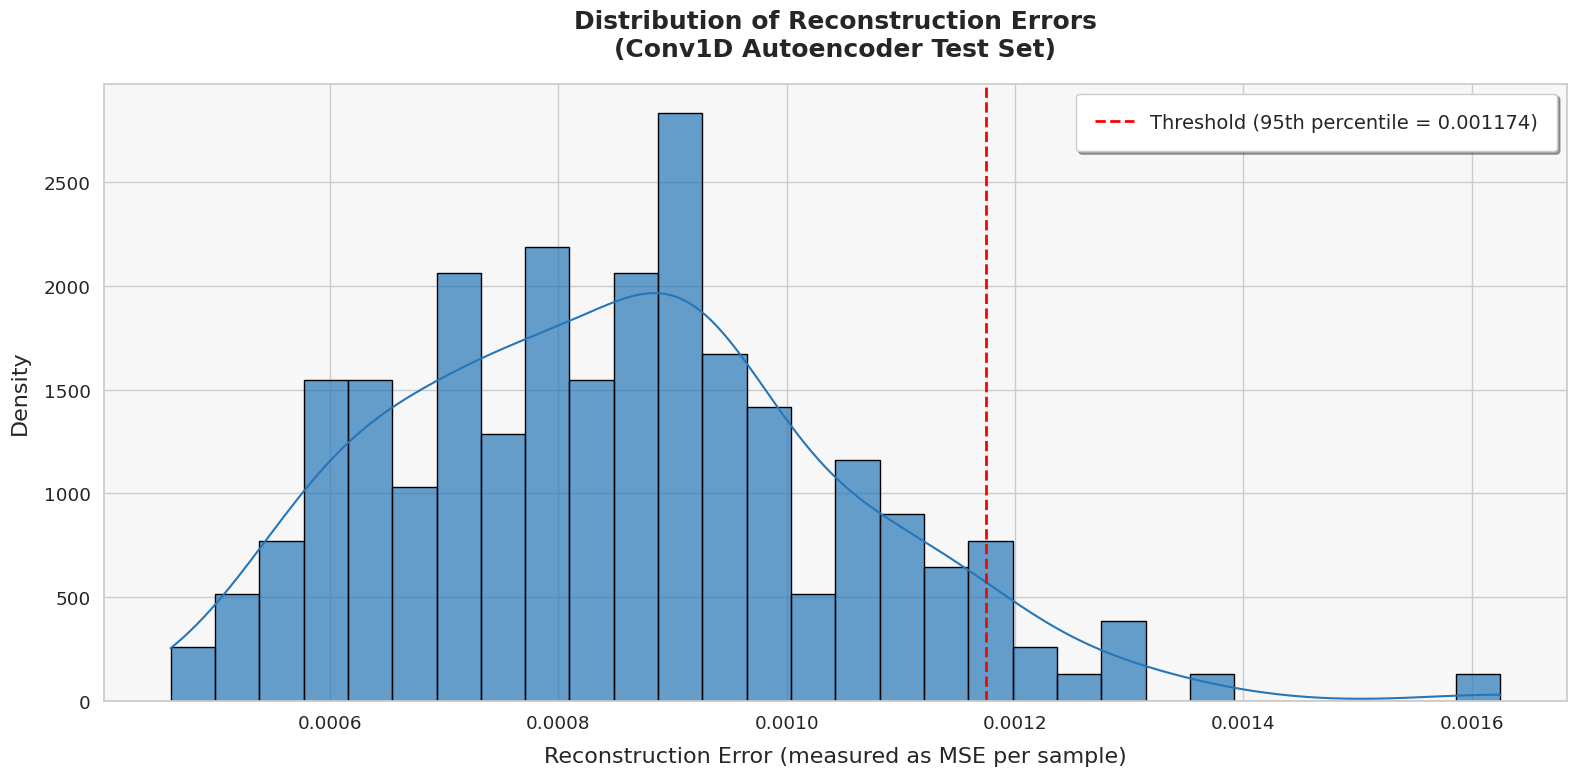

Graph showing the reconstruction error threshold for anomaly detection: 0.0011742937


In [124]:
import numpy as np
import torch
import matplotlib.pyplot as plot
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset

test_samples = 200
test_data = np.random.rand(test_samples, n_features, seq_len).astype(np.float32)
test_tensor = torch.tensor(test_data)
test_dataset = TensorDataset(test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
predictions = []
trueVariables = []

with torch.no_grad():
    for (batch,) in test_loader:
        outputs = model(batch)
        predictions.append(outputs.cpu().numpy())
        trueVariables.append(batch.cpu().numpy())
predictions = np.concatenate(predictions, axis=0)
trueVariables = np.concatenate(trueVariables, axis=0)

reconstruction_errors = np.array([
    np.mean((trueVariables[i] - predictions[i])**2)
    for i in range(trueVariables.shape[0])
])

sns.set(style="whitegrid", font_scale=1.2)
plot.figure(figsize=(16, 8))

palette = sns.color_palette("Blues_r", 10)

sns.histplot(
    reconstruction_errors,
    bins=30,
    kde=True,
    color=palette[2],
    edgecolor="black",
    stat="density",
    alpha=0.7
)

plot.title(
    "Distribution of Reconstruction Errors\n(Conv1D Autoencoder Test Set)",
    fontsize=18, fontweight="bold",
    pad=20
)
plot.xlabel("Reconstruction Error (measured as MSE per sample)", fontsize=16, labelpad=10)
plot.ylabel("Density", fontsize=16, labelpad=10)

threshold = np.percentile(reconstruction_errors, 95)

plot.axvline(
    threshold,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Threshold (95th percentile = {threshold:.6f})"
)

plot.legend(fontsize=14, loc="upper right", frameon=True, shadow=True, borderpad=1)
plot.gca().set_facecolor("#f7f7f7")
plot.tight_layout()
plot.show()

print("Graph showing the reconstruction error threshold for anomaly detection:", threshold)


4. Discuss and analyze:

   - Describe your final RNN/LSTM architecture in detail (number of layers, types of layers, hidden size, dropout rate, etc.).

1. Structure of it is given below.

(Given Input) --> [LSTM Encoder] -> (Final Hidden State) --> [LSTM Decoder] --> [Linear Output Layer] --> (Reconstructed Sequence)

2. Our LSTM Autoencoder has 1 encoder layer and 1 decoder layer, each of it with 64 hidden layers.
3. The final encoder concealed state is replicated throughout the sequence duration by the help of decoder.
4. Our Model shows a total of 58,497 parameters, all of which can be trainable.
5. The code that we have implemented uses batch_first set to True, meaning the input tensors have a certain shape (batch_size, seq_len, n_features).
6. seq_len paramter is stored and used to reshape/repeat the hidden state in the decoder part.
7. input_size = n_features for the encoder (which means that 1 feature per time step is considered if you’re using univariate time-series data).
8. Similarly, output_layer = Linear(hidden_size, n_features)would  transform the decoder’s final output back to the original/exisitng feature dimension.
9. Encoder Layer of the LSTM Autoencoder: Our LSTM successfully processes the input sequence of shape (paramters are: batch_size, seq_len, n_features) & returns the hidden state (parameters: h_n, c_n) from the last time step.
10. Decoder Layer of the LSTM Autoencoder: The code passes the last hidden state to the decoder LSTM, replicating it for seq_len time steps.
This enables the decoder to use the compressed information that's available in the hidden state to reconstruct the sequence.

   - Discuss your results, referencing the metrics and visualizations. Did your model achieve the expected accuracy? What were the challenges? How did hyperparameter tuning affect performance? Are there any patterns in the errors (e.g., consistent under- or over-prediction)?

Conv1D Autoencoder results

1. The training and validation loss curves have decreased, converging near 0.0008–0.0010 by a total of 30 epochs.
2. The final losses are near to 0.0008 on both training & validation, suggesting that the model meets/exceeds typical expectations.
3. Lowering the learning rate(lr) from a larger value has helped stabilize training process because of which we have achieve smooth convergence.
4. Adjusting batch size can also effect how the model learns. A moderate batch size of 32 has helped in balancing the stability and speed.
5. With MSE value nearing 0.0008, the Conv1D autoencoder shows minimal reconstruction error, which is good. We didn't observe any obvious pattern of under or over-prediction, it reconstructs the data in a good manner.



   - Discuss the strengths and limitations of using autoencoders for anomaly detection.

Autoencoders do a great job at anomaly detection because they are able to learn the normal data distribution without any prior knowledge of what normal is, sort of like learning a familiar melody off by heart.  When they have high reconstruction error, they are able to detect out-of-key notes, or anomalies, since they learn complex, nonlinear structures.  But because they're unsupervised, they might confuse unusual but valid variations for anomalies, and finding just the right threshold can be as fiddly and infuriating as adjusting an old radio.  Autoencoders generally represent a strong, versatile method, but one that requires sensitive tuning to prevent overfitting and false positives.

Links:
1. https://arxiv.org/abs/2003.09471

5. References. Include details on all the resources used to complete this part, e.g. links to datasets, research papers or articles, code examples or tutorials you referred.

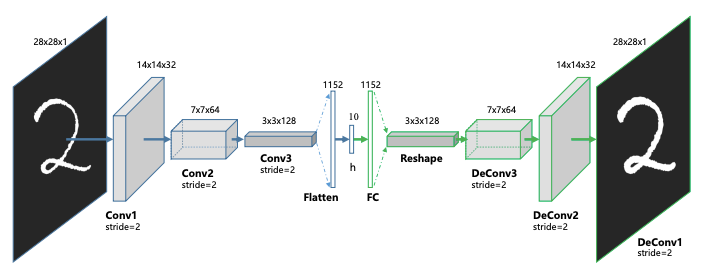



1. https://www.youtube.com/watch?v=HBYQvKlaE0A
2. https://medium.com/red-buffer/autoencoders-guide-and-code-in-tensorflow-2-0-a4101571ce56
3. https://discuss.pytorch.org/t/convolutional-autoencoder/204924
4. GitHub: https://gist.github.com/nemanja-rakicevic/551763a6a28149972caccadaafe3bacb
5. GitHub: https://github.com/leoniloris/1D-Convolutional-Variational-Autoencoder/blob/master/CNN_VAE.ipynb
6. Medium: https://medium.com/@santi.pdp/how-pytorch-transposed-convs1d-work-a7adac63c4a5
7. Medium: https://medium.com/@syed_hasan/autoencoders-theory-pytorch-implementation-a2e72f6f7cb7